#### Módulos que necesitamos

In [2]:
import cv2 as cv
import time

#### Cargamos los clasificadores pre-entrenados

El entrenamiento se basa en los filtros de Haar

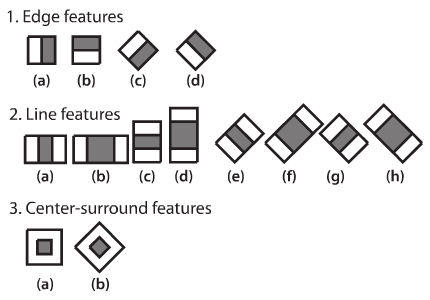

Existen varios archivos con clasificadores pre-entrenados disponibles en OpenCV: <br>

- haarcascade_eye_tree_eyeglasses.xml
- haarcascade_mcs_leftear.xml
- haarcascade_eye.xml
- haarcascade_mcs_lefteye.xml
- haarcascade_frontalface_alt2.xml
- haarcascade_mcs_mouth.xml
- haarcascade_frontalface_alt_tree.xml
- haarcascade_mcs_nose.xml
- haarcascade_frontalface_alt.xml
- haarcascade_mcs_rightear.xml
- haarcascade_frontalface_default.xml
- haarcascade_mcs_righteye.xml
- haarcascade_fullbody.xml
- haarcascade_mcs_upperbody.xml
- haarcascade_lefteye_2splits.xml
- haarcascade_profileface.xml
- haarcascade_lowerbody.xml
- haarcascade_righteye_2splits.xml
- haarcascade_mcs_eyepair_big.xml
- haarcascade_smile.xml
- haarcascade_mcs_eyepair_small.xml
- haarcascade_upperbody.xml

In [3]:
# https://github.com/opencv/opencv/tree/3.4/data/haarcascades

# Leemos los clasificadores pre-entrenados
#--------------------------------------------------------------------------------
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

#### Aplicamos el clasificador en cascada

La función utilizada es la siguiente:

cv2.CascadeClassifier.detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]])

Donde:

- __image__ : Matriz del tipo CV_8U que contiene una imagen donde se detectan objetos.
- __scaleFactor__ : parámetro que especifica cuánto se reduce el tamaño de la imagen en cada escala de imagen.
- __minNeighbors__ : parámetro que especifica cuántos vecinos debe tener cada rectángulo candidato para retenerlo. Este parámetro afectará la calidad de las caras detectadas: un valor más alto da como resultado menos detecciones pero con una calidad más alta.
- __flags__ : Parámetro con el mismo significado para una cascada antigua que en la función cvHaarDetectObjects. No se utiliza para una nueva cascada.
- __minSize__ : Tamaño mínimo posible del objeto. Los objetos más pequeños que eso se ignoran.
- __maxSize__ : Tamaño máximo de objeto posible. Los objetos más grandes que eso se ignoran.

El factor de escala se utiliza para crear una pirámide de escala como se muestra en la imagen de abajo. Supongamos que el factor de escala es 1.03, significa que estamos usando un pequeño paso para cambiar el tamaño, es decir, reducimos el tamaño en un 3%, aumentamos la posibilidad de encontrar un tamaño coincidente con el modelo para la detección, aunque es caro.

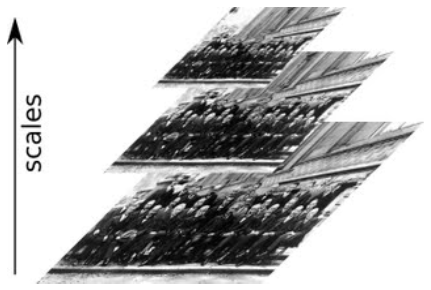


In [4]:
# Cargamos la imagen a analizar
#------------------------------
originalImage = cv.imread('Rollings.jpg')

# Pasamos la imagen a escala de grises
#-------------------------------------
grayImage = cv.cvtColor(originalImage, cv.COLOR_BGR2GRAY)
grayImage = cv.equalizeHist(grayImage)

# Llamamos al clasificador de Haar (AdaBoost)
#--------------------------------------------
#faces = face_cascade.detectMultiScale(grayImage, 1.012, 5)
faces = face_cascade.detectMultiScale(grayImage, 1.1, 1)#, minSize= (100,130),maxSize=(200,400))

# Recorro las caras encontradas
#------------------------------
for (x,y,w,h) in faces:
    # Le dibujamos un rectángulo amarillo
    cv.rectangle(originalImage,(x,y),(x+w,y+h),(255,255,0),2)
    # Definimos las ROIs en la imagen gris y color
    roi_gray = grayImage[y:y+h, x:x+w] 
    roi_color = originalImage[y:y+h, x:x+w] 
    # Para cada rostro hallado le buscamos los ojos
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 8)
    # En los ojos hallados les dibujamos rectángulos
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
cv.imshow('Detección de caras con filtros de Haar en cascada',originalImage) 
cv.waitKey(0)
cv.destroyAllWindows()

#time.sleep(10) 
#cv.destroyAllWindows()